In [1]:
import pandas as pd
import numpy as np
from scipy.io import mmread, mmwrite
import scipy.sparse as sparse

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
folder = '/gpfs/gibbs/pi/zhao/yw599/Multiome/data/MouseAtlas' 

In [11]:
# Read anno for ATAC
atac_anno = pd.read_table('%s/ATAC/cell_metadata.tissue_freq_filtered.txt' % folder)
atac_anno = atac_anno[atac_anno.tissue.isin(['Lung'])]

In [15]:
# Read anno for RNA FACS
rna_facs_anno = pd.read_csv('%s/RNA/annotations_facs.csv' % folder)
rna_facs_anno = rna_facs_anno[rna_facs_anno.tissue.isin(['Lung'])]
rna_facs_anno = rna_facs_anno[~rna_facs_anno.cell_ontology_class.isnull()]

In [16]:
# Read anno for RNA droplet
rna_droplet_anno = pd.read_csv('%s/RNA/annotations_droplet.csv' % folder)
rna_droplet_anno = rna_droplet_anno[rna_droplet_anno.tissue.isin(['Lung'])]
rna_droplet_anno = rna_droplet_anno[~rna_droplet_anno.cell_ontology_class.isnull()]

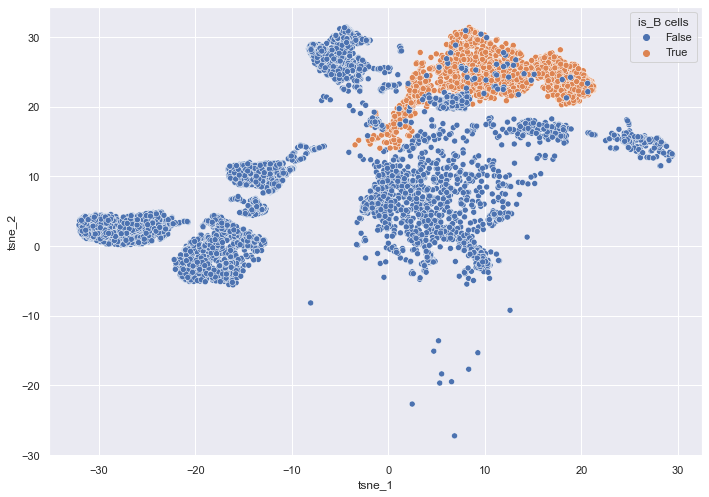

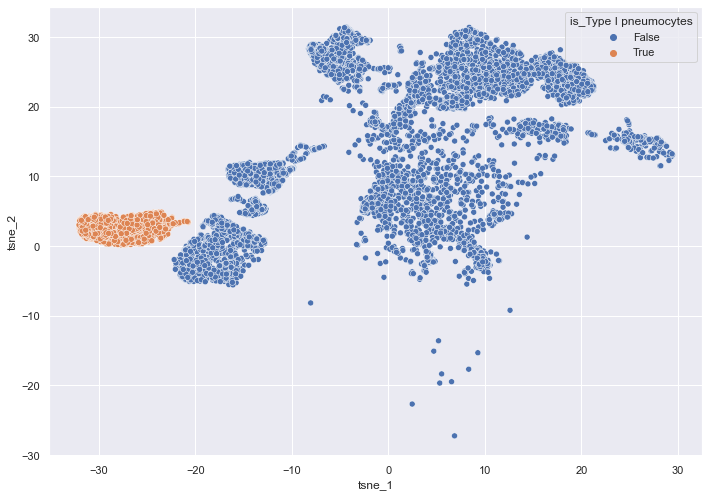

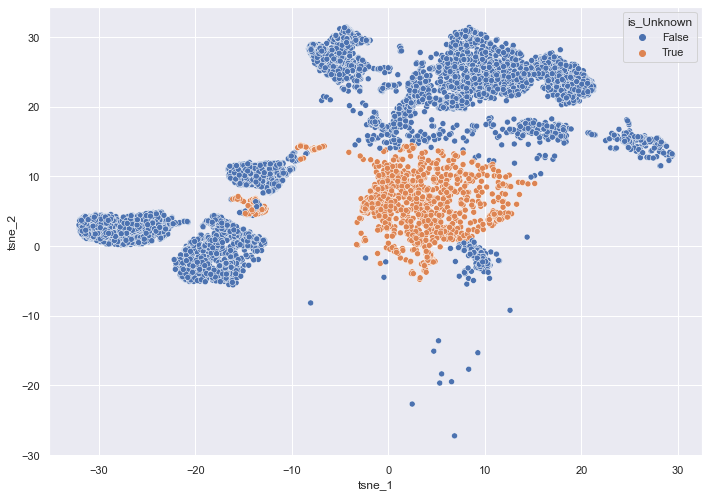

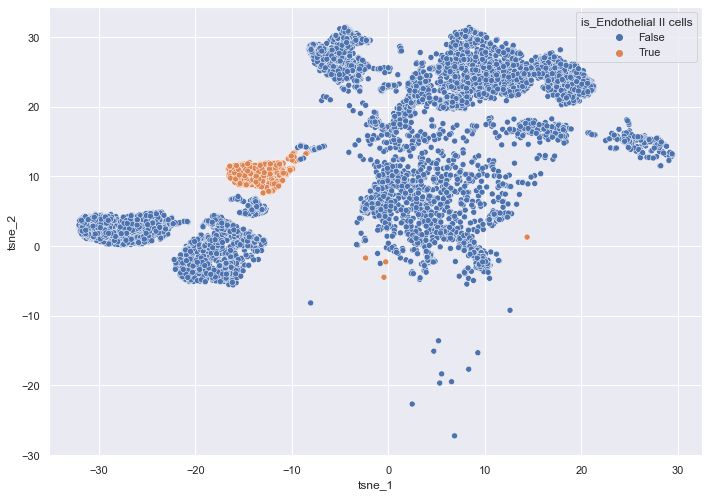

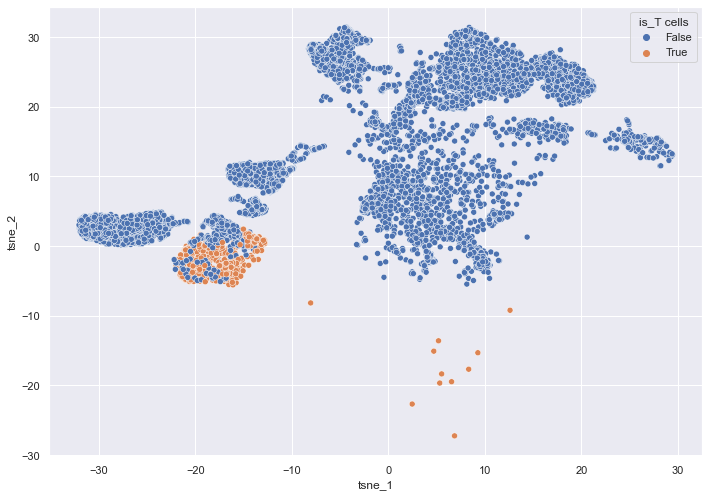

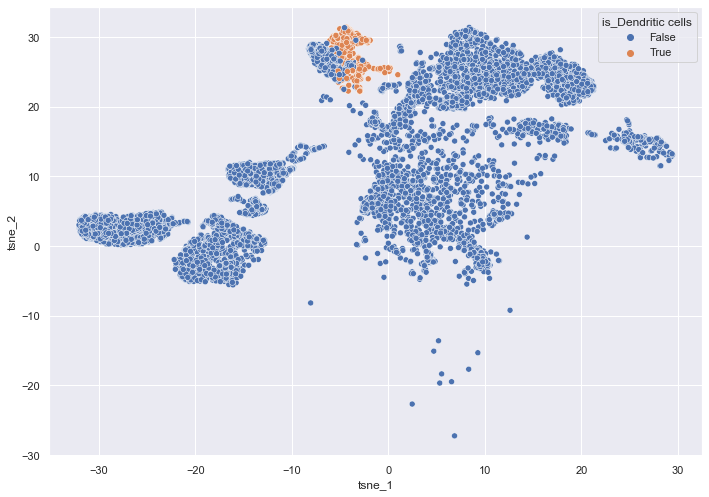

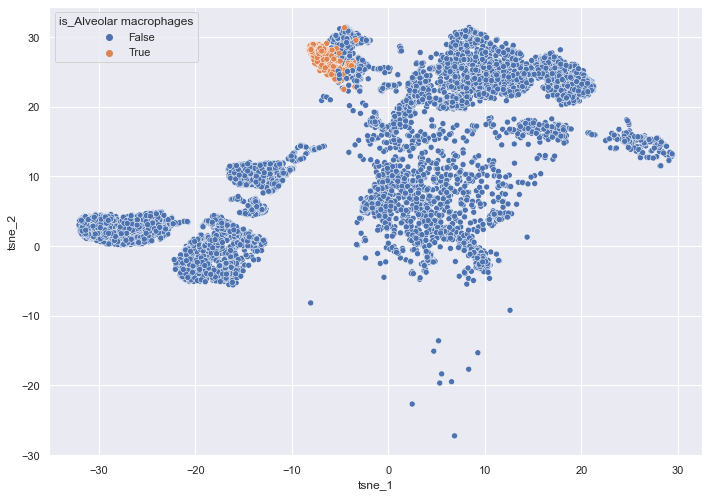

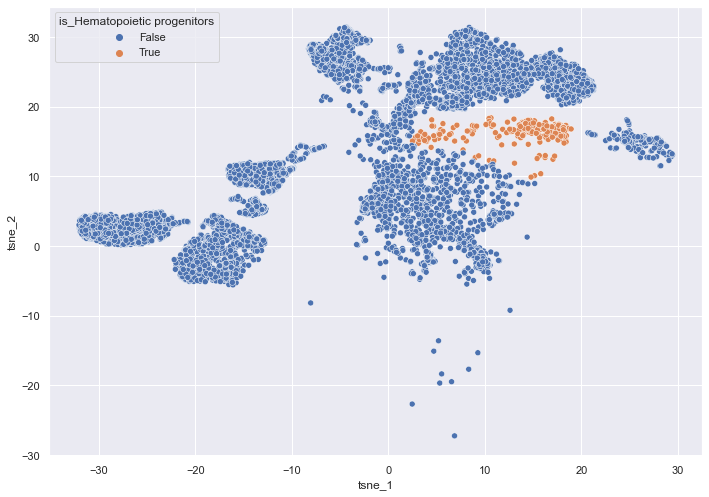

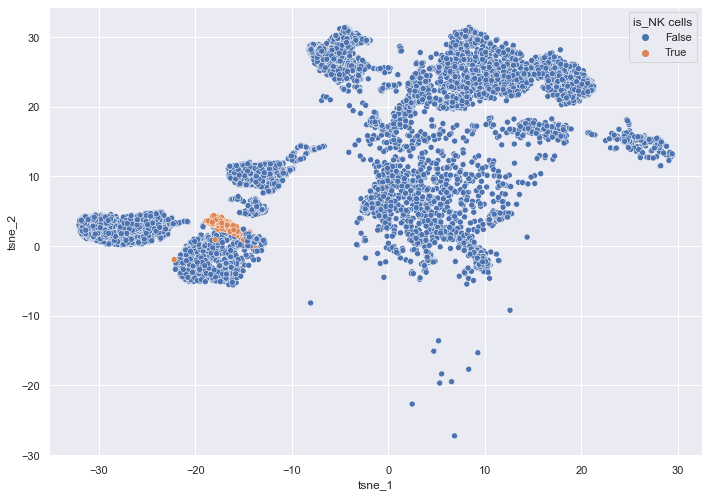

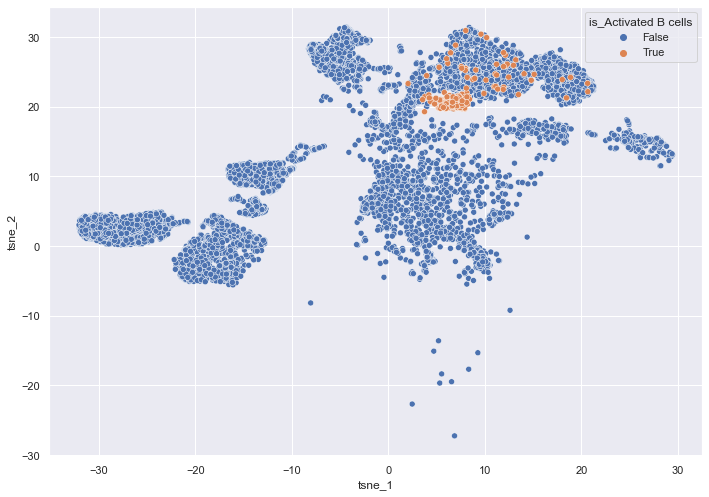

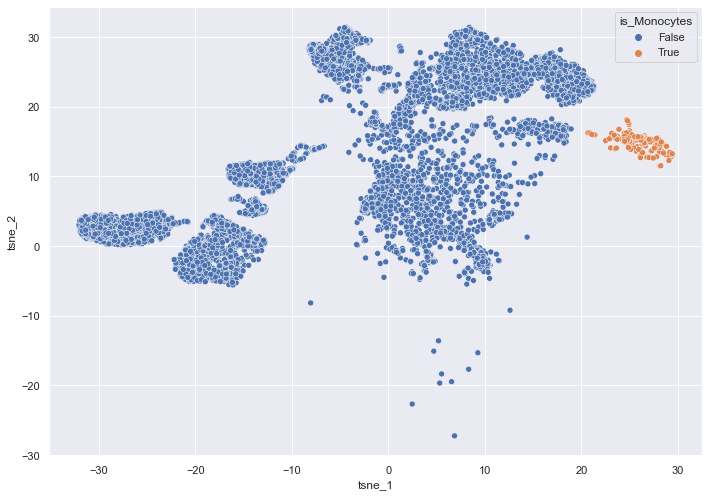

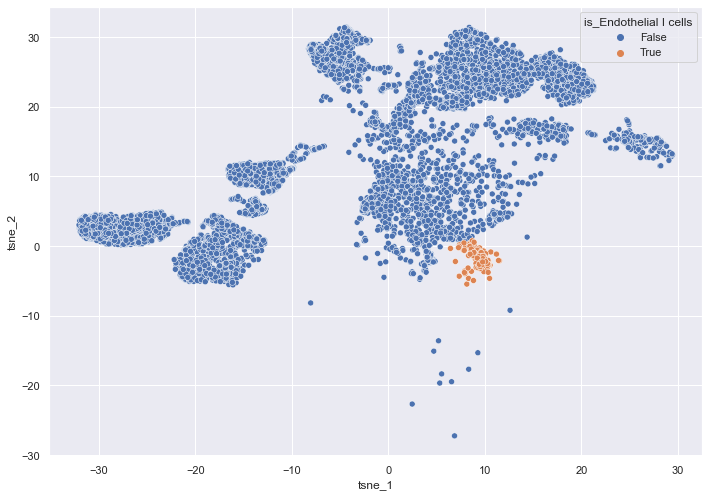

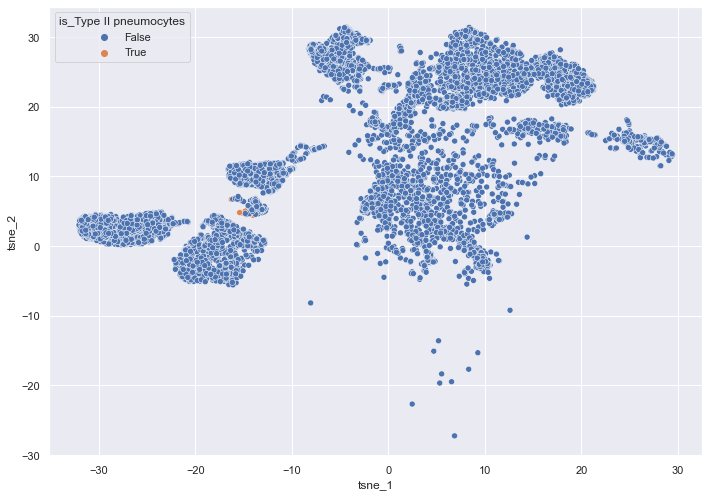

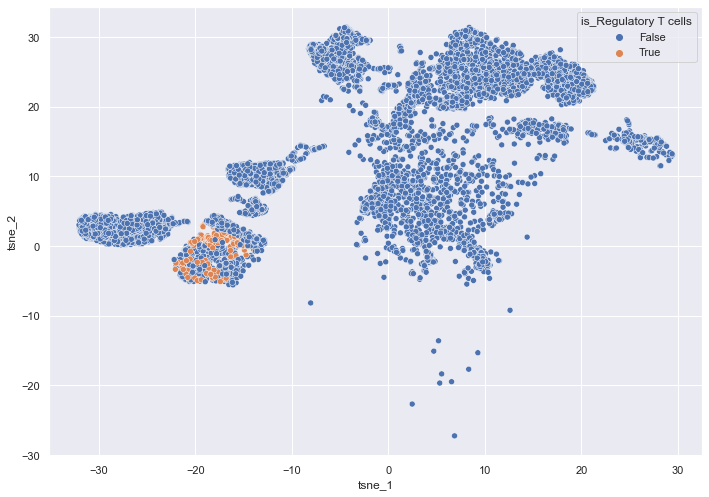

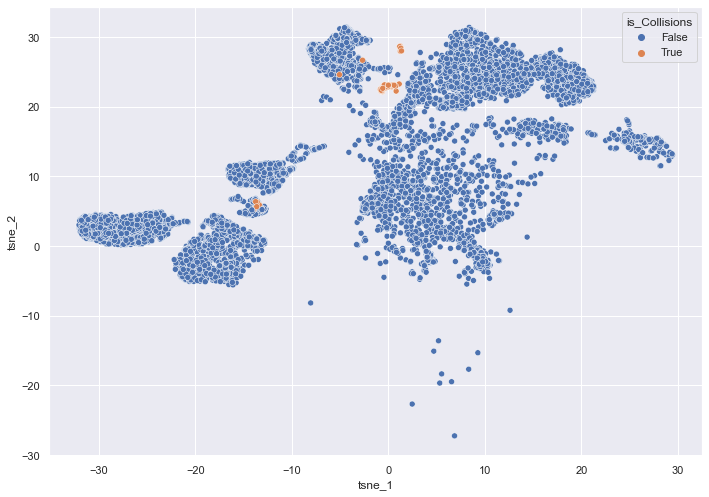

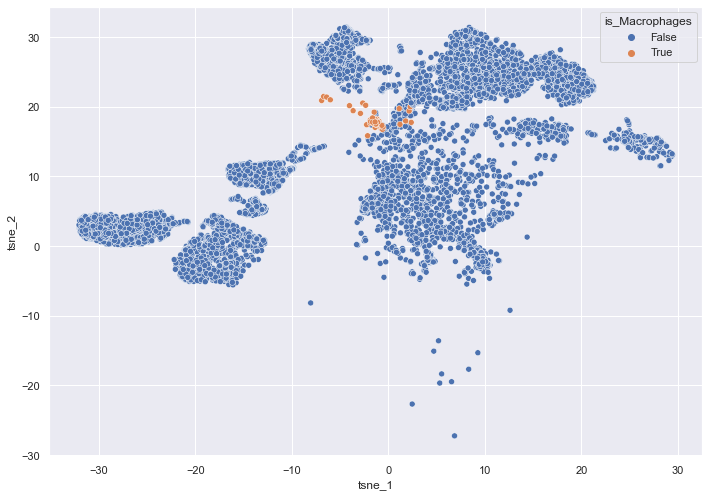

In [19]:
temp = atac_anno.copy()
for c in temp.cell_label.value_counts().index:
    fig, ax = plt.subplots()
    temp['is_%s' % c] = temp.cell_label == c
    sns.scatterplot(x='tsne_1', y='tsne_2', data=temp, hue='is_%s' % c, ax=ax)

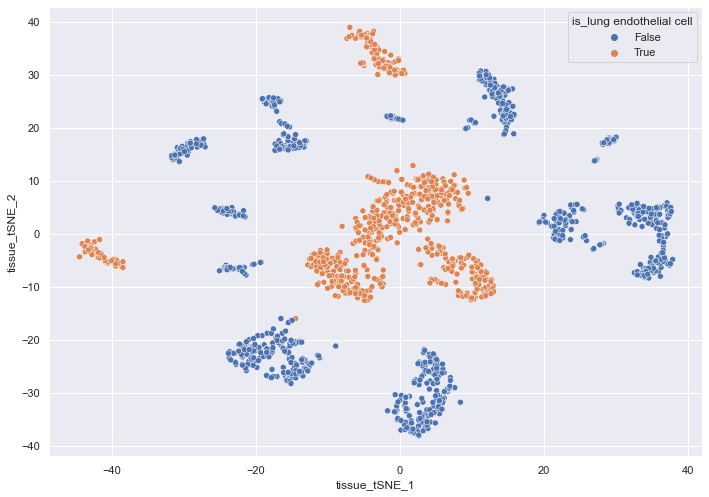

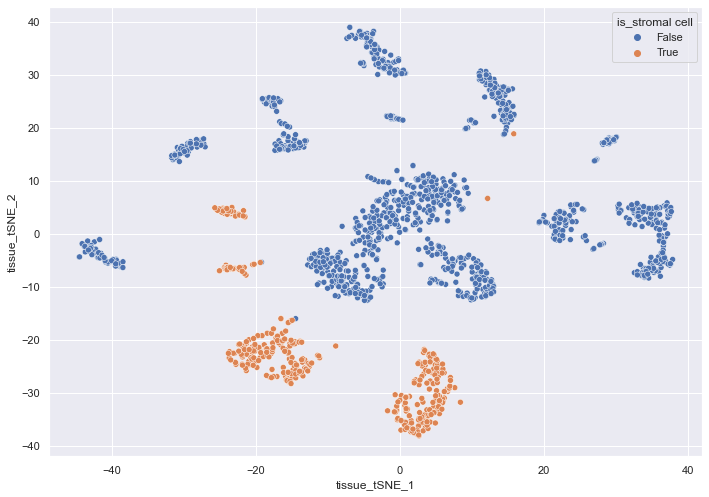

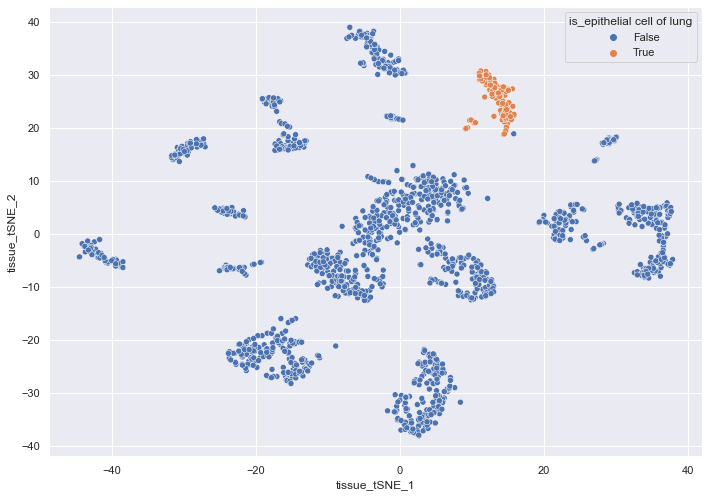

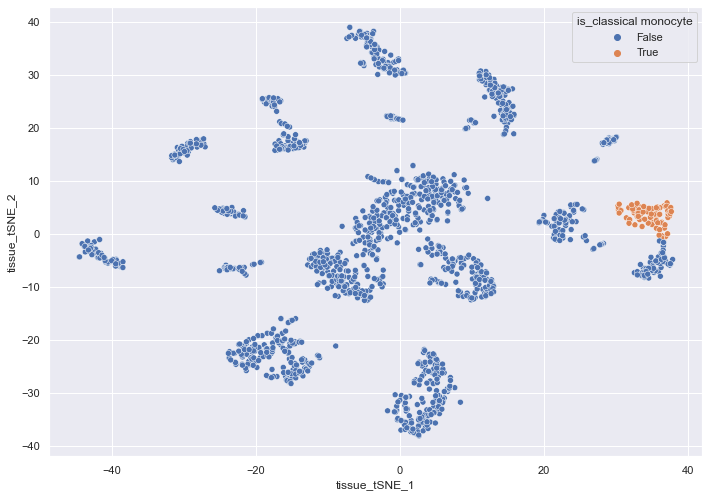

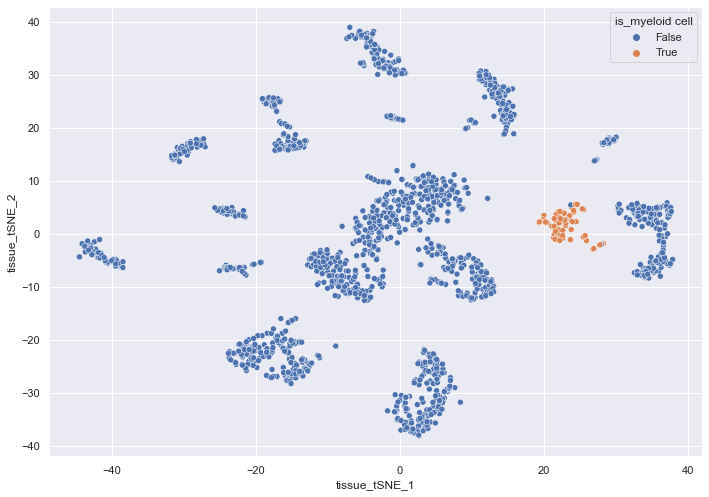

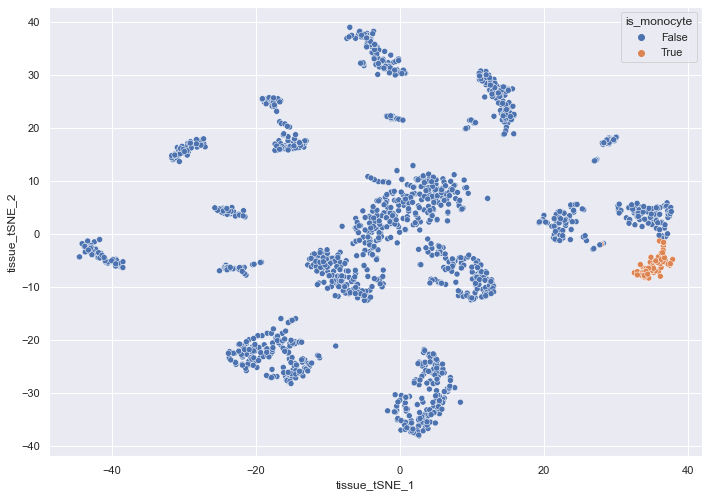

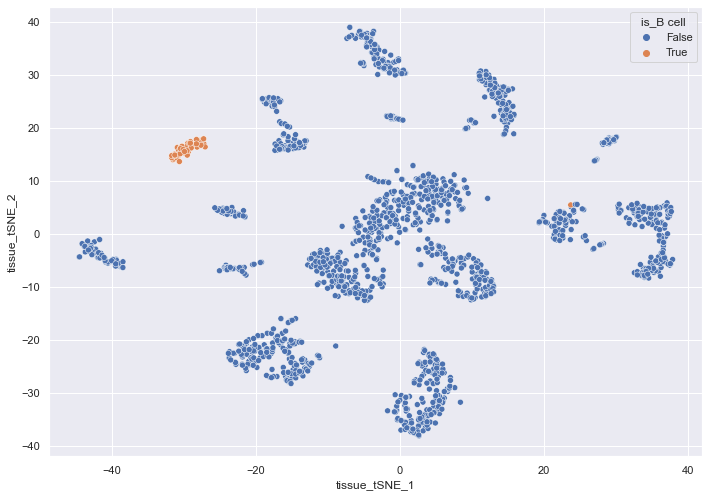

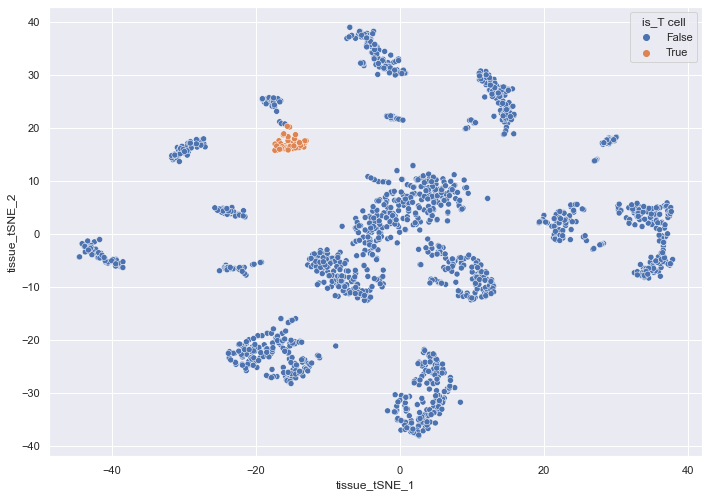

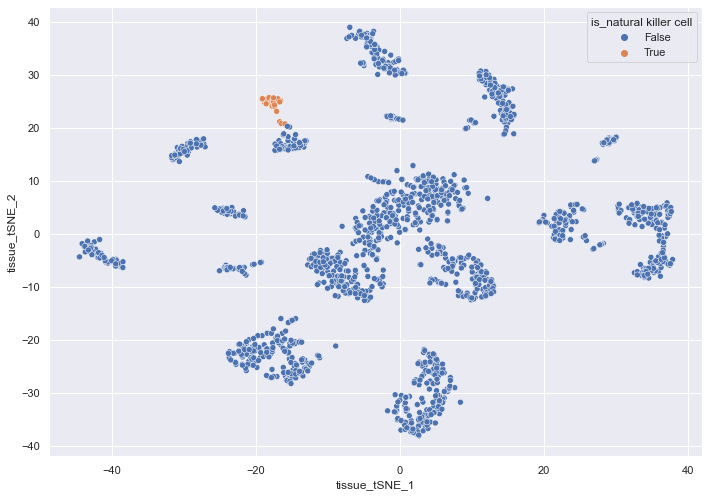

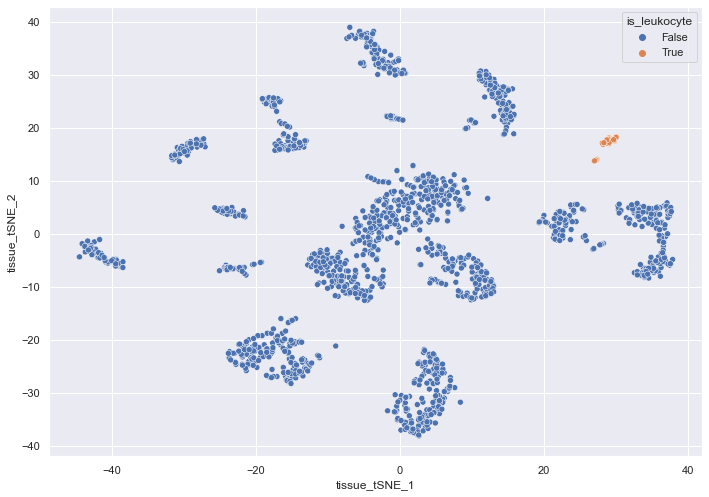

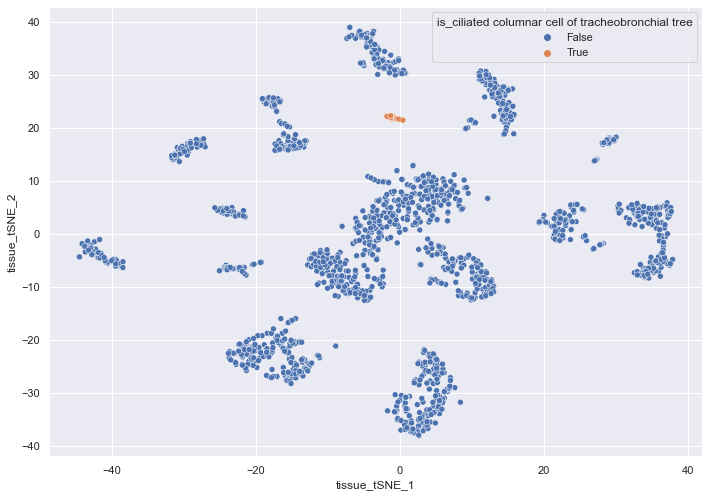

In [20]:
temp = rna_facs_anno.copy()
for c in temp.cell_ontology_class.value_counts().index:
    fig, ax = plt.subplots()
    temp['is_%s' % c] = temp.cell_ontology_class == c
    sns.scatterplot(x='tissue_tSNE_1', y='tissue_tSNE_2', data=temp, hue='is_%s' % c, ax=ax)

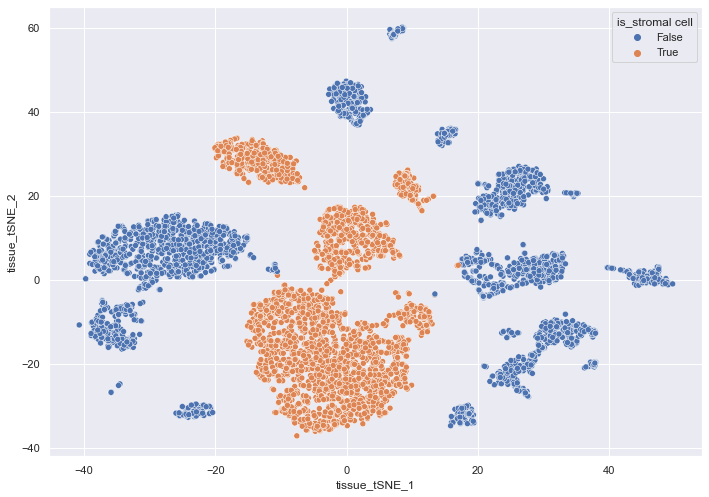

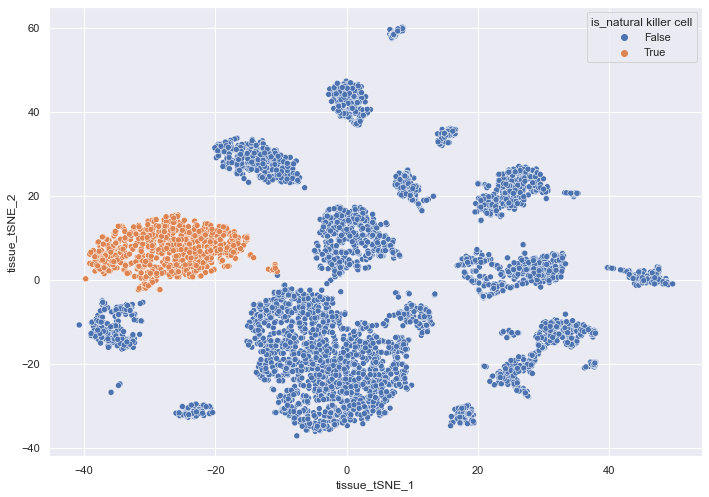

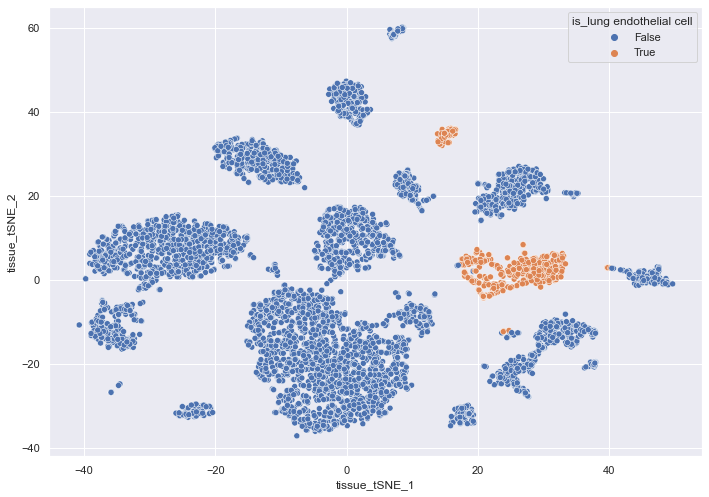

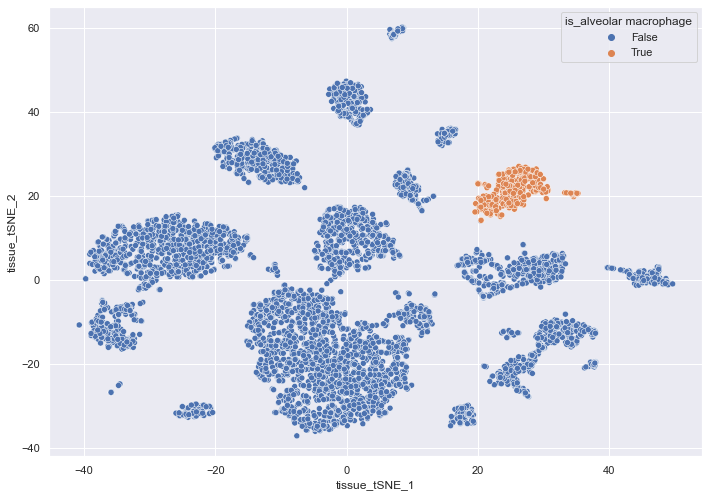

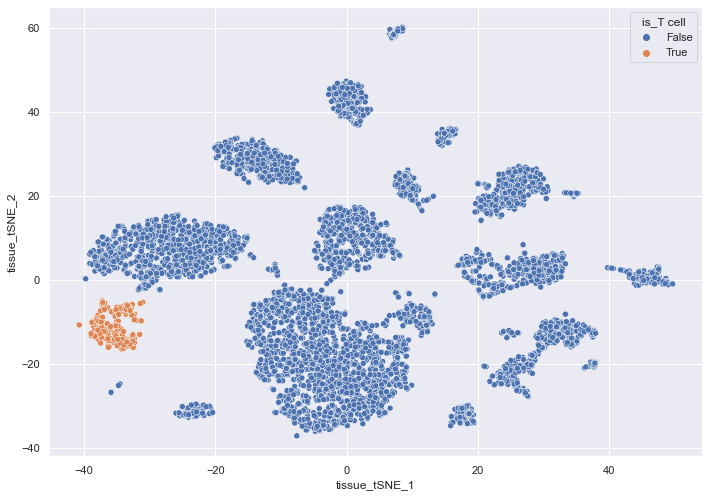

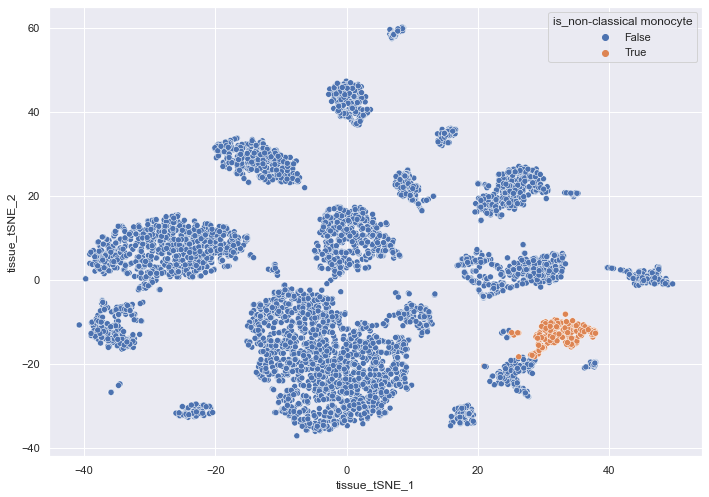

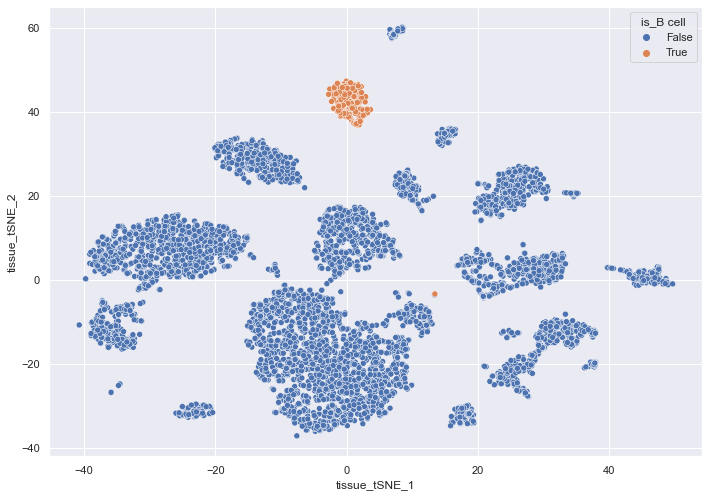

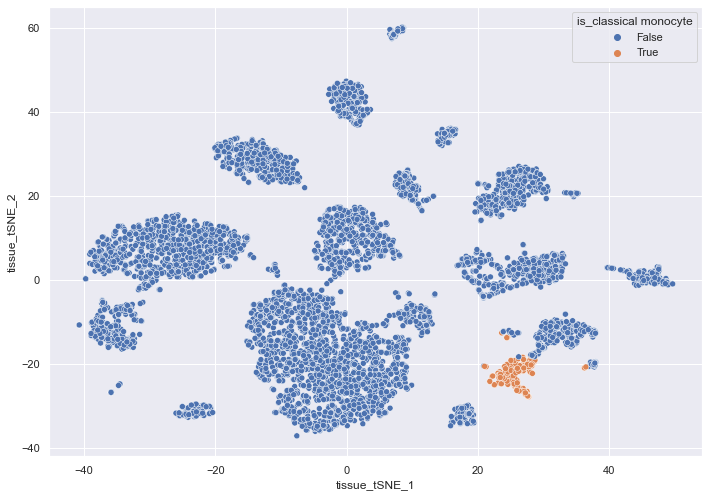

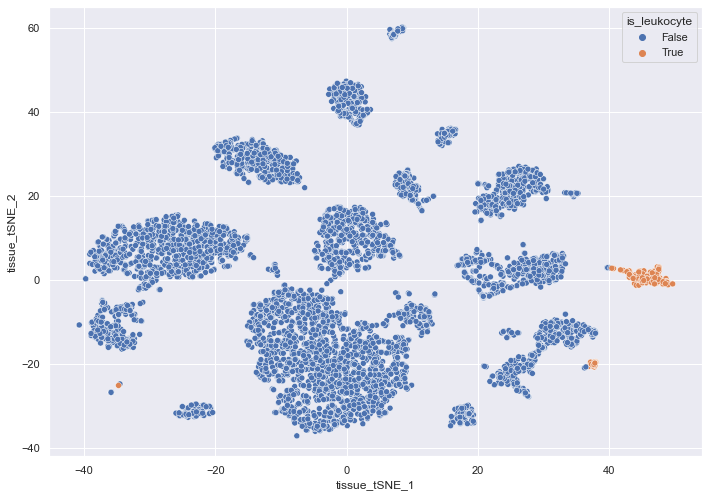

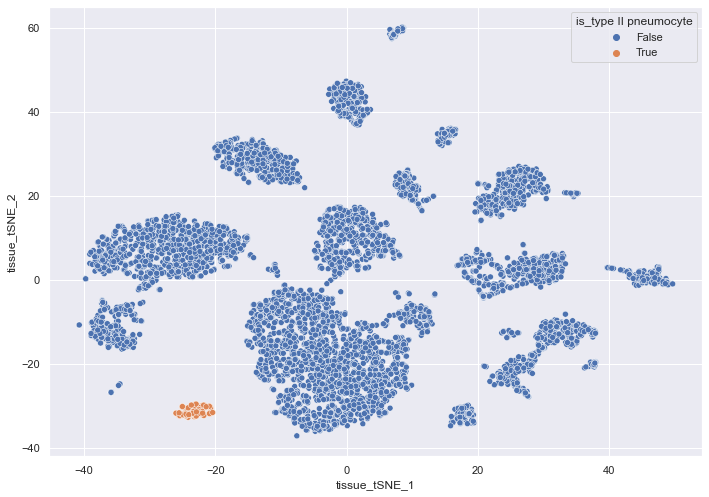

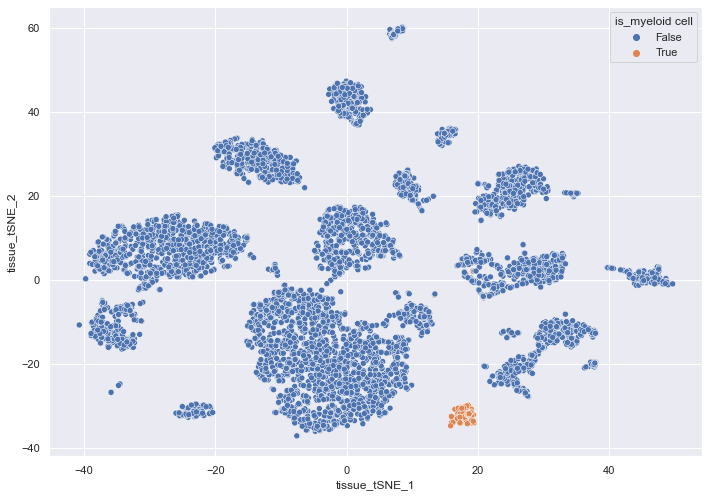

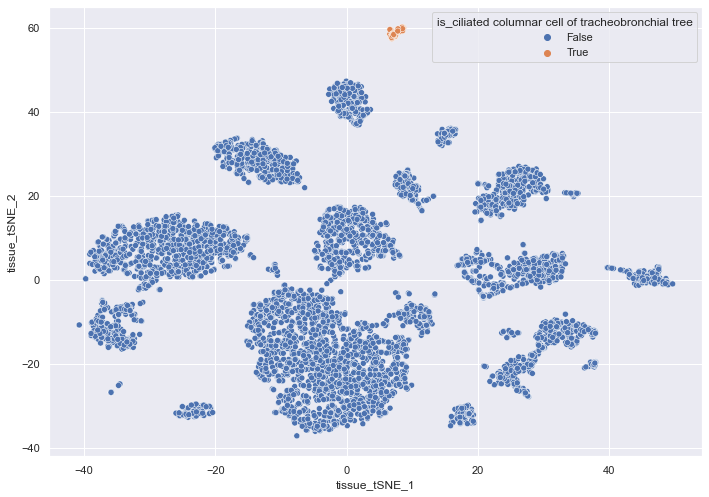

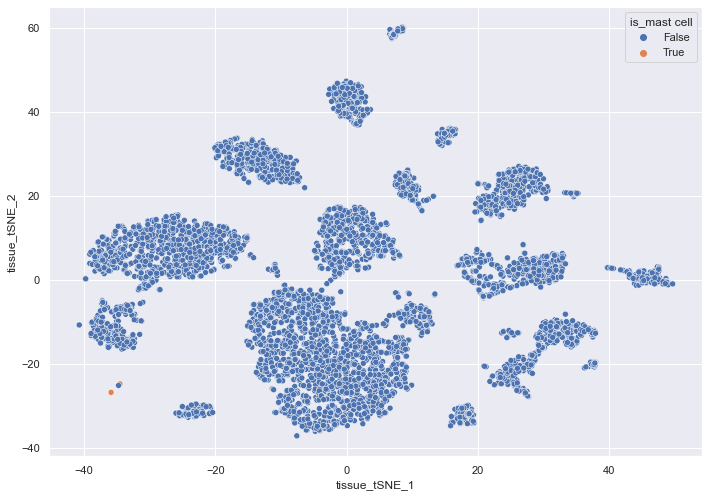

In [21]:
temp = rna_droplet_anno.copy()
for c in temp.cell_ontology_class.value_counts().index:
    fig, ax = plt.subplots()
    temp['is_%s' % c] = temp.cell_ontology_class == c
    sns.scatterplot(x='tissue_tSNE_1', y='tissue_tSNE_2', data=temp, hue='is_%s' % c, ax=ax)

In [22]:
rna_facs_anno.cell_ontology_class.value_counts().index.difference(rna_droplet_anno.cell_ontology_class.value_counts().index)

Index(['epithelial cell of lung', 'monocyte'], dtype='object')

In [23]:
rna_droplet_anno.cell_ontology_class.value_counts().index.difference(rna_facs_anno.cell_ontology_class.value_counts().index)

Index(['alveolar macrophage', 'mast cell', 'non-classical monocyte',
       'type II pneumocyte'],
      dtype='object')

In [24]:
rna_facs_anno.cell_ontology_class.value_counts().index.intersection(rna_droplet_anno.cell_ontology_class.value_counts().index)

Index(['lung endothelial cell', 'stromal cell', 'classical monocyte',
       'myeloid cell', 'B cell', 'T cell', 'natural killer cell', 'leukocyte',
       'ciliated columnar cell of tracheobronchial tree'],
      dtype='object')

In [25]:
pd.crosstab(rna_droplet_anno.free_annotation, rna_droplet_anno.cell_ontology_class)

cell_ontology_class                          ciliated columnar cell of tracheobronchial tree  \
free_annotation                                                                                
alveolar epithelial type 2 cells                                                           0   
circulating monocytes                                                                      0   
dendritic cells and interstital macrophages                                                0   
invading monocytes                                                                         0   
multiciliated cells                                                                       49   

cell_ontology_class                          classical monocyte  myeloid cell  \
free_annotation                                                                 
alveolar epithelial type 2 cells                              0             0   
circulating monocytes                                         0             0   
dendritic cells and interstital macrophages                   0            87   
invading monocytes                                          161             0   
multiciliated cells                                           0             0   

cell_ontology_class                          non-classical monocyte  \
free_annotation                                                       
alveolar epithelial type 2 cells                                  0   
circulating monocytes                                           220   
dendritic cells and interstital macrophages                       0   
invading monocytes                                                0   
multiciliated cells                                               0   

cell_ontology_class                          type II pneumocyte  
free_annotation                                                  
alveolar epithelial type 2 cells                             89  
circulating monocytes                                         0  
dendritic cells and interstital macrophages                   0  
invading monocytes                                            0  
multiciliated cells                                           0

In [26]:
pd.crosstab(rna_facs_anno.free_annotation, rna_facs_anno.cell_ontology_class)

cell_ontology_class                                 ciliated columnar cell of tracheobronchial tree  \
free_annotation                                                                                       
alveolar epithelial type 1 cells, alveolar epit...                                                0   
circulating monocytes                                                                             0   
dendritic cells, alveolar macrophages, and inte...                                                0   
invading monocytes                                                                                0   
mast cells and unknown immune cells                                                               0   
multiciliated cells                                                                              25   

cell_ontology_class                                 classical monocyte  \
free_annotation                                                          
alveolar epithelial type 1 cells, alveolar epit...                   0   
circulating monocytes                                                0   
dendritic cells, alveolar macrophages, and inte...                   0   
invading monocytes                                                  90   
mast cells and unknown immune cells                                  0   
multiciliated cells                                                  0   

cell_ontology_class                                 epithelial cell of lung  \
free_annotation                                                               
alveolar epithelial type 1 cells, alveolar epit...                      113   
circulating monocytes                                                     0   
dendritic cells, alveolar macrophages, and inte...                        0   
invading monocytes                                                        0   
mast cells and unknown immune cells                                       0   
multiciliated cells                                                       0   

cell_ontology_class                                 leukocyte  monocyte  \
free_annotation                                                           
alveolar epithelial type 1 cells, alveolar epit...          0         0   
circulating monocytes                                       0        65   
dendritic cells, alveolar macrophages, and inte...          0         0   
invading monocytes                                          0         0   
mast cells and unknown immune cells                        35         0   
multiciliated cells                                         0         0   

cell_ontology_class                                 myeloid cell  
free_annotation                                                   
alveolar epithelial type 1 cells, alveolar epit...             0  
circulating monocytes                                          0  
dendritic cells, alveolar macrophages, and inte...            85  
invading monocytes                                             0  
mast cells and unknown immune cells                            0  
multiciliated cells                                            0

In [27]:
# Rename cells in ATAC
rename_atac = {'B cells': 'B cell',
'Activated B cells': 'B cell',
'T cells': 'T cell',
'Regulatory T cells': 'T cell',
'NK cells': 'NK cell',
'Endothelial II cells': 'Endothelial cell',
'Endothelial I cells': 'Endothelial cell',
'Monocytes': 'Monocyte',
'Dendritic cells': 'Dendritic cell',         
'Alveolar macrophages': 'Alveolar macrophage',       
'Macrophages': 'Macrophage',               
'Hematopoietic progenitors': 'Hematopoietic progenitor',
'Type II pneumocytes': 'Pneumocyte',    
'Type I pneumocytes': 'Pneumocyte',    
'Collisions': 'Collision'    
}
atac_anno['annotation'] = atac_anno.cell_label.replace(rename_atac)

In [28]:
# Rename cells in RNA FACS
rename_rna_facs = {'lung endothelial cell': 'Endothelial cell',
                   'stromal cell': 'Stromal cell',
                   'epithelial cell of lung': 'Pneumocyte',
                   'classical monocyte': 'Monocyte',
                   'myeloid cell': 'Myeloid cell',
                   'monocyte': 'Monocyte',
                   'natural killer cell': 'NK cell',
                   'leukocyte': 'Leukocyte',
                   'ciliated columnar cell of tracheobronchial tree': 'Multiciliated cell'}
rna_facs_anno['annotation'] = rna_facs_anno.cell_ontology_class.replace(rename_rna_facs)

In [29]:
# Rename cells in RNA droplet
rename_rna_droplet = {'lung endothelial cell': 'Endothelial cell',
                      'stromal cell': 'Stromal cell',
                      'classical monocyte': 'Monocyte',
                      'non-classical monocyte': 'Monocyte',
                      'myeloid cell': 'Myeloid cell',
                      'monocyte': 'Monocyte',
                      'natural killer cell': 'NK cell',
                      'leukocyte': 'Leukocyte',
                      'alveolar macrophage': 'Alveolar macrophage',
                      'mast cell': 'Leukocyte',
                      'type II pneumocyte': 'Pneumocyte',
                      'ciliated columnar cell of tracheobronchial tree': 'Multiciliated cell'}
rna_droplet_anno['annotation'] = rna_droplet_anno.cell_ontology_class.replace(rename_rna_droplet)

In [30]:
atac_anno.annotation.value_counts()

B cell                      2546
Pneumocyte                  1778
Unknown                     1535
Endothelial cell            1363
T cell                       770
Dendritic cell               575
Alveolar macrophage          557
Hematopoietic progenitor     268
NK cell                      211
Monocyte                     205
Collision                     65
Macrophage                    51
Name: annotation, dtype: int64

In [31]:
rna_facs_anno.annotation.value_counts()

Endothelial cell      693
Stromal cell          423
Monocyte              155
Pneumocyte            113
Myeloid cell           85
B cell                 57
T cell                 53
NK cell                37
Leukocyte              35
Multiciliated cell     25
Name: annotation, dtype: int64

In [32]:
rna_droplet_anno.annotation.value_counts()

Stromal cell           2540
NK cell                 824
Endothelial cell        462
Monocyte                381
Alveolar macrophage     345
T cell                  247
B cell                  204
Leukocyte               176
Pneumocyte               89
Myeloid cell             87
Multiciliated cell       49
Name: annotation, dtype: int64

In [33]:
atac_anno.annotation.value_counts().index.difference(rna_facs_anno.annotation.value_counts().index)

Index(['Alveolar macrophage', 'Collision', 'Dendritic cell',
       'Hematopoietic progenitor', 'Macrophage', 'Unknown'],
      dtype='object')

In [34]:
rna_facs_anno.annotation.value_counts().index.difference(atac_anno.annotation.value_counts().index)

Index(['Leukocyte', 'Multiciliated cell', 'Myeloid cell', 'Stromal cell'], dtype='object')

In [35]:
atac_anno.annotation.value_counts().index.intersection(rna_facs_anno.annotation.value_counts().index)

Index(['B cell', 'Pneumocyte', 'Endothelial cell', 'T cell', 'NK cell',
       'Monocyte'],
      dtype='object')

In [36]:
atac_anno.annotation.value_counts().index.difference(rna_droplet_anno.annotation.value_counts().index)

Index(['Collision', 'Dendritic cell', 'Hematopoietic progenitor', 'Macrophage',
       'Unknown'],
      dtype='object')

In [37]:
rna_droplet_anno.annotation.value_counts().index.difference(atac_anno.annotation.value_counts().index)

Index(['Leukocyte', 'Multiciliated cell', 'Myeloid cell', 'Stromal cell'], dtype='object')

In [38]:
atac_anno.annotation.value_counts().index.intersection(rna_droplet_anno.annotation.value_counts().index)

Index(['B cell', 'Pneumocyte', 'Endothelial cell', 'T cell',
       'Alveolar macrophage', 'NK cell', 'Monocyte'],
      dtype='object')

In [39]:
# Save
atac_anno.to_csv('%s/ATAC/cell_metadata.tissue_freq_filtered_lung.txt' % folder)
rna_droplet_anno.to_csv('%s/RNA/annotations_droplet_lung.csv' % folder)
rna_facs_anno.to_csv('%s/RNA/annotations_facs_lung.csv' % folder)